### **The Lab:**

1. Pick something else on Craigslist besides used cars: Musical instruments, roommates, antiques, etc. Look at the search page and its source code. Record which fields/data you would like to gather, and what kinds of basic EDA you'd do with it.
2. Get your search results of interest using requests and extract data from them using beautifulSoup, using code similar to what's above.
3. Wrangle your data into a dataframe and do some basic descriptions and plots. Try to find some interesting relationships or stories to tell about your data.

In [1]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:124.0) Gecko/20100101 Firefox/124.0'}
url = 'https://www.ebay.com/sch/i.html?_nkw=basketball+shoes&_sacat=0&_from=R40&_trksid=p4439441.m570.l1313'


#HTML content
raw = requests.get(url, headers=header) #Get page
bsObj = soup(raw.content, 'html.parser') #Parse HTML
listings = bsObj.find_all('div', {'class': 's-item__info'})  #Find all listings

# # Create an empty list to store the scraped data
data = []

## Loop through each listing found in the search results
for listing in listings:
    try:
        # Get title (took a few attempts to find the 'aria-level' part in the 'inspect' HTMl):
        title = listing.find('span', {'role': 'heading', 'aria-level': '3'}).get_text(strip=True)

        # Get price:
        price_tag = listing.find('span', {'class': 's-item__price'})
        price = price_tag.get_text(strip=True) if price_tag else 'N/A'

        # Get shipping info:
        shipping_tag = listing.find('span', {'class': 's-item__shipping'})
        shipping = shipping_tag.get_text(strip=True) if shipping_tag else 'N/A'

        # Get product link:
        link_tag = listing.find('a', {'class': 's-item__link'})
        link = link_tag['href'] if link_tag else 'N/A'

        # Attempting to extract the image (I dont think this worked):
        img_tag = listing.find('img', {'class': 's-item__image-img'})
        image_url = img_tag['src'] if img_tag else 'N/A'

        # Appending the data to the list
        data.append({
            'Title': title,
            'Price': price,
            'Shipping': shipping,
            'Link': link,
            'Image URL': image_url
        })
    except Exception as e:
        print(f"Error processing listing: {e}") #put this part in because I kept getting an error before

# Converting data into a DataFrame
df = pd.DataFrame(data)
df.to_csv('basketball_shoes.csv', index=False) # Save data in case of a disaster
print(df)


                                                Title    Price  \
0                                        Shop on eBay   $20.00   
1                                        Shop on eBay   $20.00   
2   PUMA Men's Genetics Marcus Smart Basketball Shoes   $39.99   
3   PUMA Men's MELO x DEXTER'S LAB MB.03 Basketbal...   $84.00   
4   Jordan Air Jordan 4 retro ''military black'' f...   $88.88   
..                                                ...      ...   
65  Nike Zoom Kevin Durant Mens US 18 Red White Ba...   $74.00   
66     PUMA Men's Scuderia Ferrari Caven 2.0 Sneakers   $37.99   
67  JORDAN MENS LIFT OFF BASKETBALL SHOES #AR4430 101   $80.00   
68  Nike Kyrie Infinity TB Promo Size 10 Gold Whit...   $66.49   
69  Nike Kobe 8 Protro Venice Beach FQ3548-001 – S...  $290.00   

            Shipping                                               Link  \
0                N/A  https://ebay.com/itm/123456?itmmeta=012DEW30YG...   
1                N/A  https://ebay.com/itm/123456?itmmeta

In [7]:
# Wrangling!

import seaborn as sns
df = pd.read_csv('basketball_shoes.csv')

#Kept getting an error that price wasn't a numeric value, so had to remove non-numeric characters, and convert values to numeric
#Price:
df['Price'] = df['Price'].str.replace(r'[^\d.]', '', regex=True)  # Removing non-numeric characters except for '.'
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')  # Converting to numeric and replacing invalid values with NaN

#Also kept getting an error here that this was not numeric so had to also convert to numeric
#Shipping:
df['Shipping'] = df['Shipping'].replace({'Free shipping': 0, r'\+.*': '', ',': '', 'Free delivery': 0}, regex=True)
df['Shipping'] = pd.to_numeric(df['Shipping'], errors='coerce').fillna(0)  # Converting to numeric and replace NaN with 0

# Summary statistics
print("Statistics:")
print(df.describe())


Statistics:
            Price  Shipping  Image URL
count   66.000000      70.0        0.0
mean    72.319697       0.0        NaN
std     60.298978       0.0        NaN
min     16.990000       0.0        NaN
25%     37.992500       0.0        NaN
50%     62.940000       0.0        NaN
75%     83.000000       0.0        NaN
max    375.000000       0.0        NaN


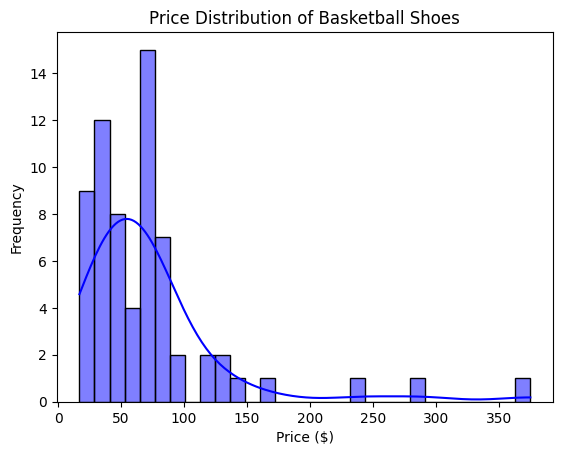

In [9]:
#Graph 1: Histogram of Distribution of Prices
sns.histplot(df['Price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution of Basketball Shoes')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

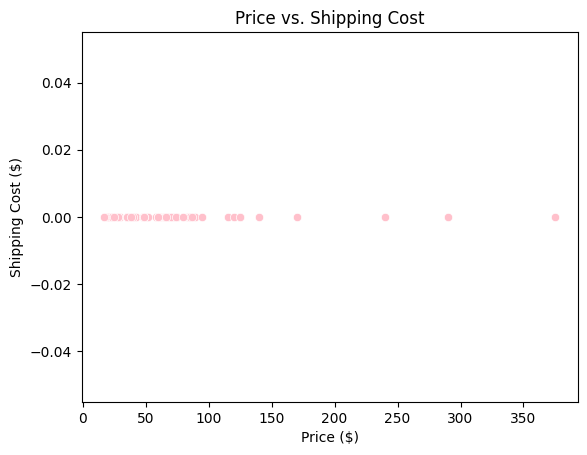

In [11]:
#Graph 2: A scatterplot of Price vs Shipping
sns.scatterplot(x='Price', y='Shipping', data=df, color='pink')
plt.title('Price vs. Shipping Cost')
plt.xlabel('Price ($)')
plt.ylabel('Shipping Cost ($)')
plt.show()

<ipython-input-12-ef192e196740>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='viridis')


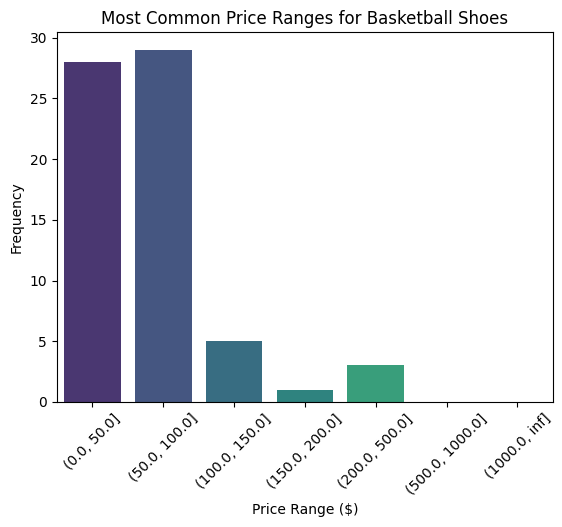

In [12]:
#Graph 3: The most common price ranges (graph I saw online and attempted to do)
price_ranges = pd.cut(df['Price'], bins=[0, 50, 100, 150, 200, 500, 1000, float('inf')])
price_range_counts = price_ranges.value_counts()

sns.barplot(x=price_range_counts.index, y=price_range_counts.values, palette='viridis')
plt.title('Most Common Price Ranges for Basketball Shoes')
plt.xlabel('Price Range ($)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

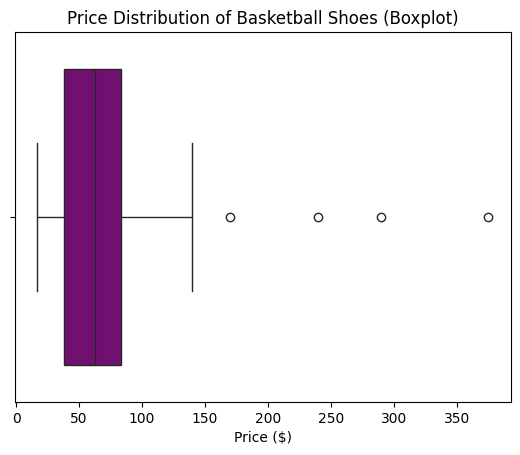

In [15]:
#Graph 4: Just playing around with how a boxplot would look here (and the color purple)
sns.boxplot(x=df['Price'], color='purple')
plt.title('Price Distribution of Basketball Shoes (Boxplot)')
plt.xlabel('Price ($)')
plt.show()



<ipython-input-20-e3573b71559f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='coolwarm') #very cool color ombré situation


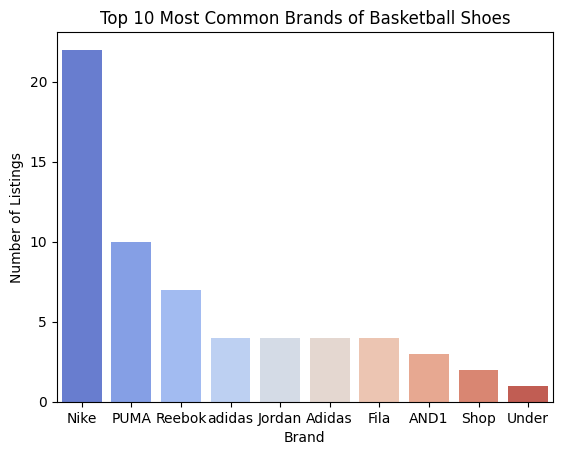

In [20]:
# Graph 5: Top Brands
df['Brand'] = df['Title'].apply(lambda x: x.split()[0])  # Had to extract the first word as a brand

brand_counts = df['Brand'].value_counts().head(10)

sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='coolwarm') #very cool color ombré situation
plt.title('Top 10 Most Common Brands of Basketball Shoes')
plt.xlabel('Brand')
plt.ylabel('Number of Listings')
plt.show()



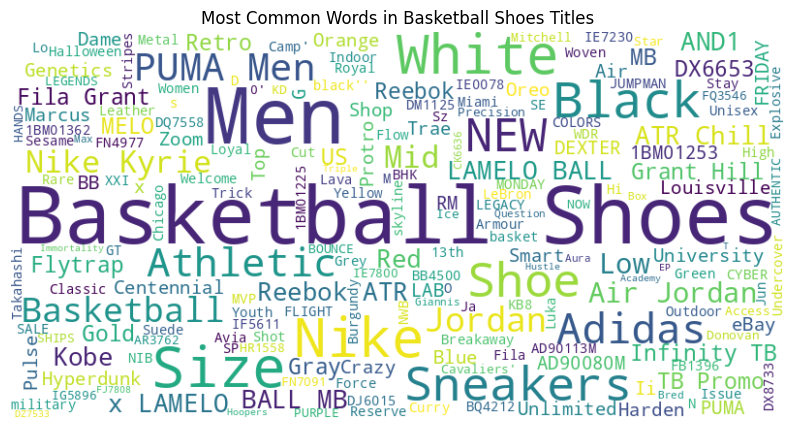

In [23]:
from wordcloud import WordCloud #found this wordcloud function and thought to try it out

#This was created from the title column
text = " ".join(title for title in df['Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text) #making it readable

plt.figure(figsize=(10,6)) #making it bigger in size (super small before)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Common Words in Basketball Shoes Titles')
plt.axis('off')
plt.show()
